In [5]:
import numpy as np
import pandas as pd
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = "https://en.wikipedia.org/wiki/Carpet_plot"

In [11]:
#A rug plot is a compact way of illustrating the marginal distributions of a 
#variable along x and y. Positions of the data points along x and y are denoted 
#by tick marks, reminiscent of the tassels on a rug.
dataset = randn(25)

(0, 1)

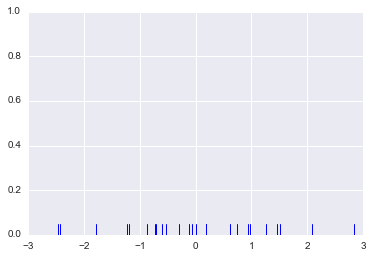

In [18]:
sns.rugplot(dataset)
#to make it clear and set y limit and set upper and lower limit
plt.ylim(0,1)

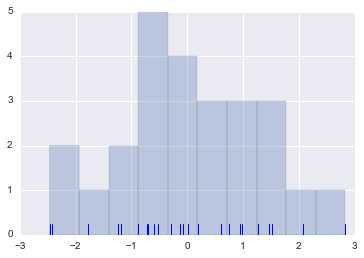

In [19]:
#plot a histogram on top and counting the number of ticks in each bin
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

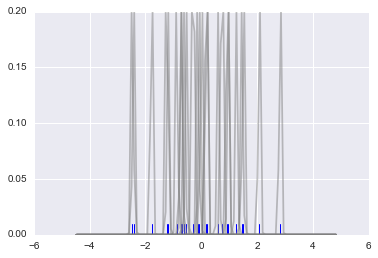

In [29]:
#kernel density plot 
sns.rugplot(dataset)
#x axis
xMin = dataset.min() -2
xMax = dataset.max() + 2
#linear space. 100 equally spaced point, set the practical estimation of bandwidth
xAxis = np.linspace(xMin,xMax,100)
bandwidth = ( (4*dataset.std()**5)/(3*len(dataset))) * 0.2
#gaussian plots for the kernels.
kernelList = []
for dataPoint in dataset:
    # Create a kernel for each point and append it to the kernel list
    kernel = stats.norm(dataPoint,bandwidth).pdf(xAxis)
    kernelList.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    #resize
    kernel = kernel * 0.4
    
    plt.plot(xAxis,kernel,color = 'grey',alpha = 0.5)
    #plt.ylim(0,1)
   

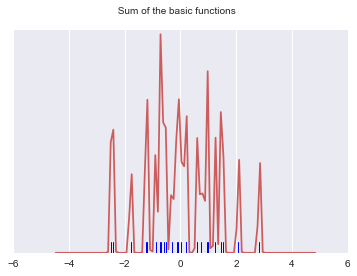

In [30]:
#sum
sumOfKde = np.sum(kernelList,axis = 0)
fig = plt.plot(xAxis,sumOfKde,color ='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle(" Sum of the basic functions")

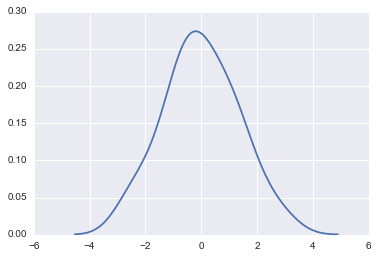

In [31]:
# this is the shorter way to do everything up
#seaborne gets itself bandwidth estimates
sns.kdeplot(dataset)

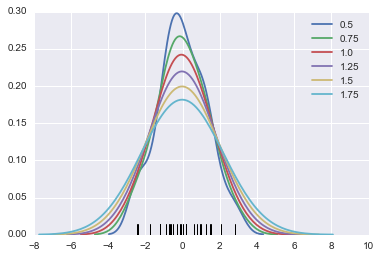

In [33]:
#adjust the bandwidth of kde
sns.rugplot(dataset,color = 'black')
#plot for various bandwidth
#based on bandwidth choice value

for bw in np.arange(0.5,2,.25):
    sns.kdeplot(dataset,bw = bw,lw = 1.8,label = bw)

In [34]:
# choose different kind of kernels
url = 'https://en.wikipedia.org/wiki/Kernel_(statistics)'

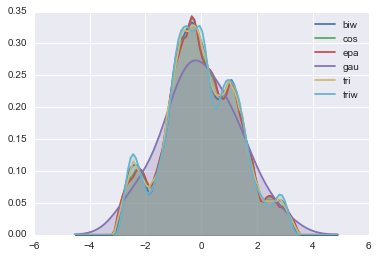

In [36]:
kernelOptions = ['biw','cos','epa','gau','tri','triw']
for kern in kernelOptions:
    sns.kdeplot(dataset,kernel = kern,label = kern,shade = True)#shading

TypeError: There is no Line2D property "verticle"

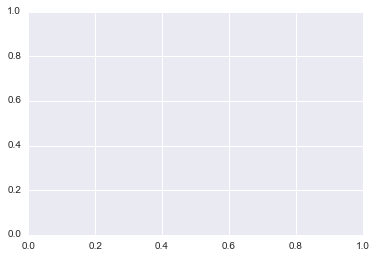

In [38]:

#plot on y axis
sns.kdeplot(dataset,verticle = True) #There is no Line2D property "verticle"


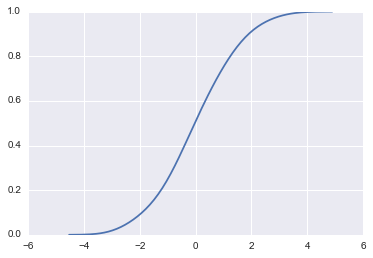

In [40]:
#kde plot for cummulative frequency distribution
url = 'https://en.wikipedia.org/wiki/Cumulative_distribution_function'
sns.kdeplot(dataset,cumulative = True)

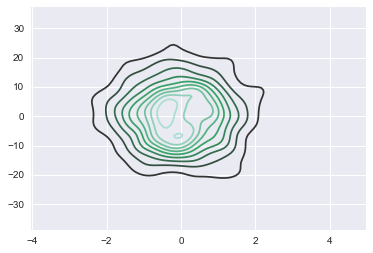

In [50]:
#kde plot for multiple data
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)
dFrame = pd.DataFrame(dataset2,columns =['X','Y'])
dFrame
sns.kdeplot(dFrame)

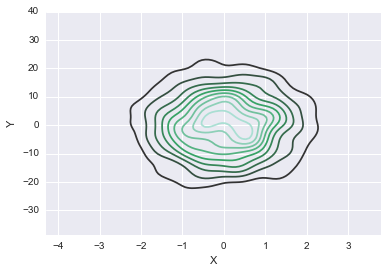

In [43]:
#pass two vectors separately
sns.kdeplot(dFrame.X,dFrame.Y)

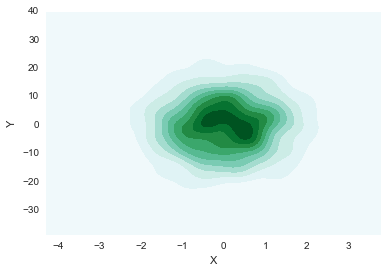

In [44]:
#shade argument instead of contour lines
sns.kdeplot(dFrame.X,dFrame.Y,shade = True)

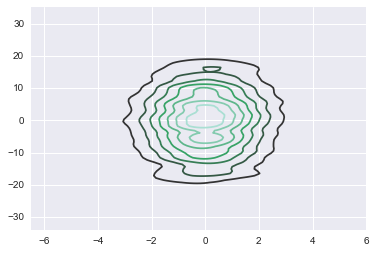

In [45]:
sns.kdeplot(dFrame,bw = 1)

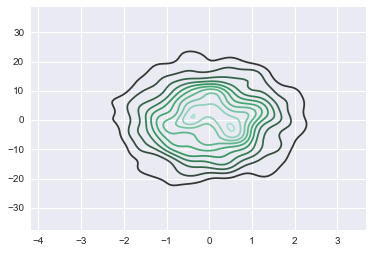

In [46]:
#silverman rule of thumb estimation
sns.kdeplot(dFrame,bw = 'silverman')

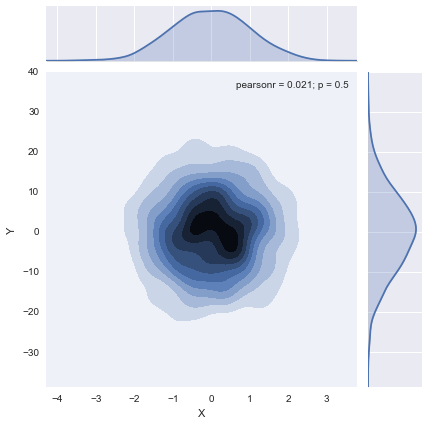

In [47]:
#kde join plot
sns.jointplot('X','Y',dFrame,kind='kde')